In [1]:
! pwd
! ls -F
from __future__ import absolute_import, division, print_function, unicode_literals
import foo
#from importlib import reload
#foo=reload(foo)
foo.main()
import tensorflow as tf
from tensorflow.python.framework import test_util
from tensorflow.keras.models import Sequential
from tensorflow import keras as K
from tensorflow.keras.layers import Dense, Flatten, Softmax
#import tensorflow_datasets as tfds
print(f'xx tensorflow {tf.__version__}')
import bar as F
import numpy as np
import matplotlib.pyplot as plt



/d/ray/eclipsepythonworkspace/series
bar.py
foo.ipynb
foo.py
s.py
src/
platform: CPython
tensorflow 2.10.1
main
xx tensorflow 2.10.1


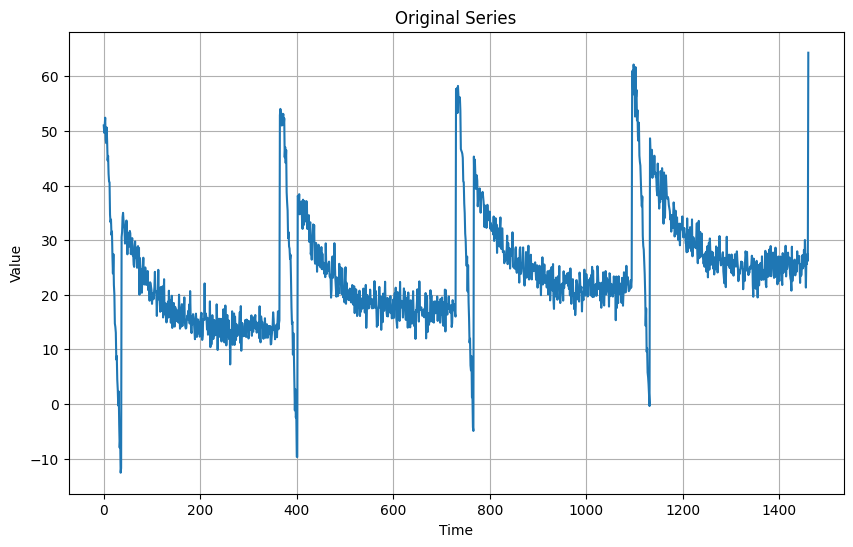

In [2]:
time,series=F.generateTimeSeriesData()
plt.figure(figsize=(10, 6))
F.plot_series(time,series,title='Original Series')
plt.show()

(1461,)


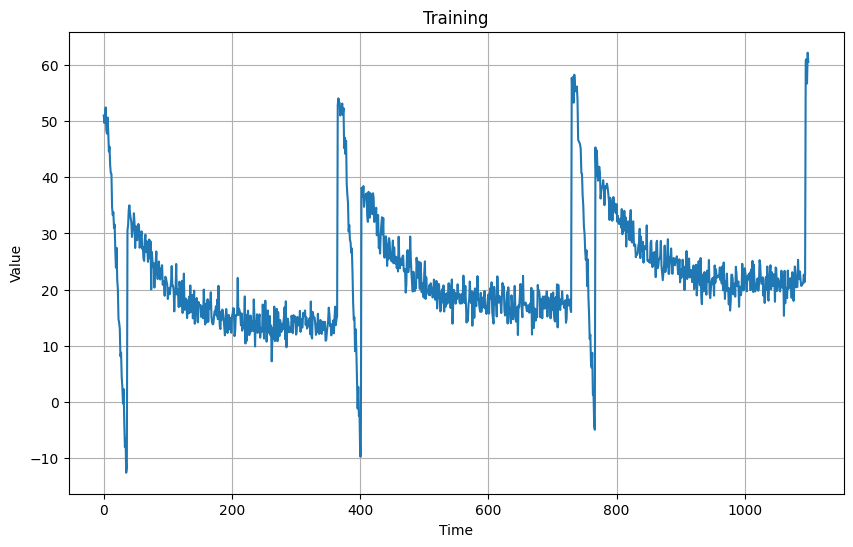

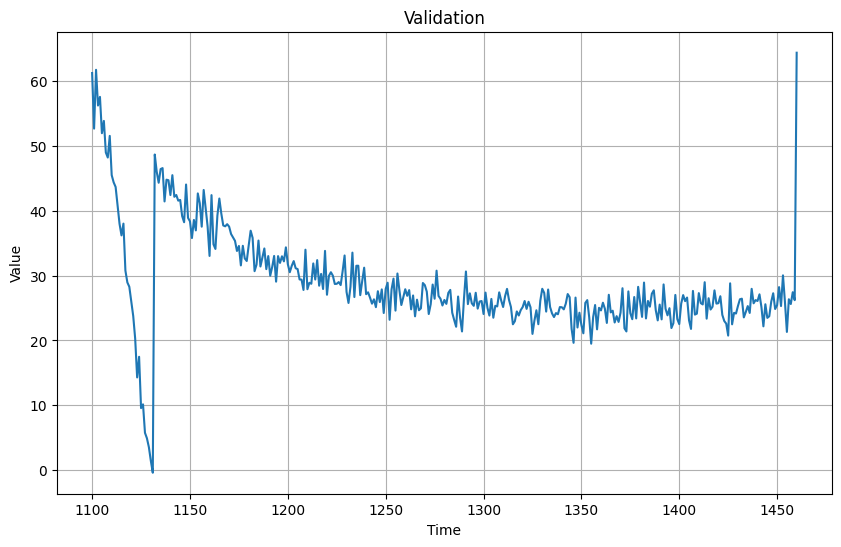

In [3]:
# Test your function
time,series=F.generateTimeSeriesData()
print(time.shape)
splitTime=1100
time_train, series_train, time_valid, series_valid = F.train_val_split(time,series,splitTime)

plt.figure(figsize=(10, 6))
F.plot_series(time_train, series_train, title="Training")
plt.show()

plt.figure(figsize=(10, 6))
F.plot_series(time_valid, series_valid, title="Validation")
plt.show()

In [4]:
dir(F)
F.testComputeMetrics()

mse: 1.0, mae: 1.0 for series of zeros and prediction of ones

mse: 0.0, mae: 0.0 for series of ones and prediction of ones

metrics are numpy numeric types: True


validation series has shape: (361,)

naive forecast has shape: (361,)

comparable with validation series: True


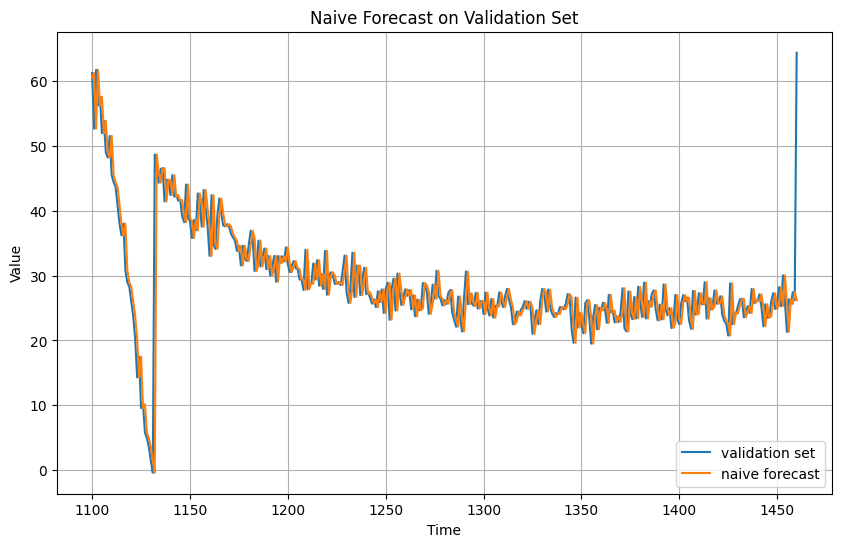

In [5]:
naive_forecast =  series[splitTime-1:-1]
print(f"validation series has shape: {series_valid.shape}\n")
print(f"naive forecast has shape: {naive_forecast.shape}\n")
print(f"comparable with validation series: {series_valid.shape == naive_forecast.shape}")
plt.figure(figsize=(10, 6))
F.plot_series(time_valid, series_valid, label="validation set")
F.plot_series(time_valid, naive_forecast, label="naive forecast",title='Naive Forecast on Validation Set')

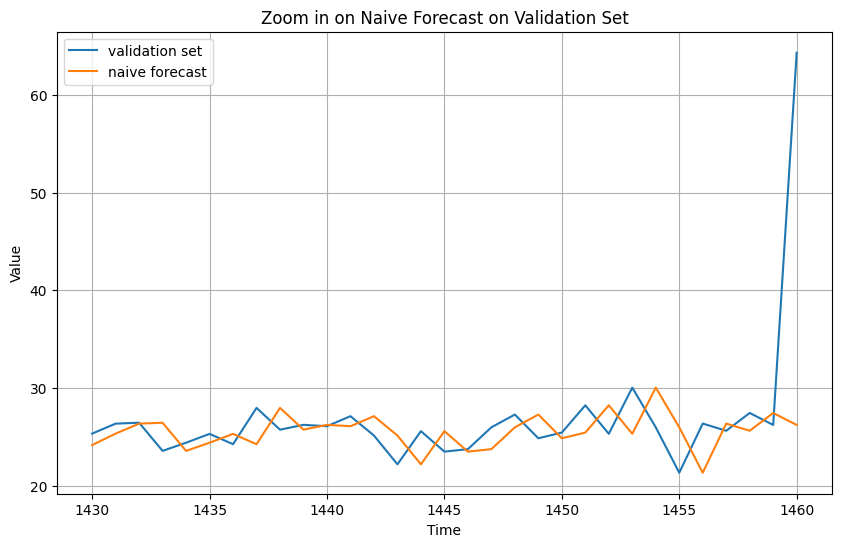

In [6]:
# zoom in
plt.figure(figsize=(10, 6))
F.plot_series(time_valid, series_valid, start=330, end=361, label="validation set")
F.plot_series(time_valid, naive_forecast, start=330, end=361, label="naive forecast",title='Zoom in on Naive Forecast on Validation Set')

In [7]:
mse, mae = F.compute_metrics(series_valid, naive_forecast)

print(f"mse: {mse:.2f}, mae: {mae:.2f} for naive forecast")
# expected: mse: 19.58, mae: 2.60 for naive forecast

mse: 19.58, mae: 2.60 for naive forecast


In [8]:
print(f"Whole series has {len(series)} elements so the moving average forecast should have {len(series)-30} elements")

Whole series has 1461 elements so the moving average forecast should have 1431 elements


moving average forecast with whole SERIES has shape: (1431,)

moving average forecast after slicing has shape: (361,)

comparable with validation series: True


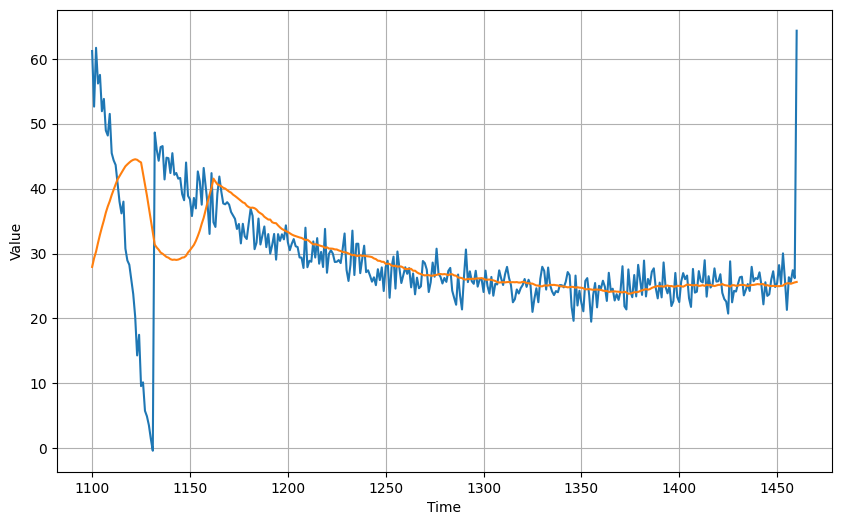

In [9]:
# Test your function
window_size=30
moving_avg =F. moving_average_forecast(series, window_size)
print(f"moving average forecast with whole SERIES has shape: {moving_avg.shape}\n")

# Slice it so it matches the validation period
moving_avg = moving_avg[splitTime - window_size:]
print(f"moving average forecast after slicing has shape: {moving_avg.shape}\n")
print(f"comparable with validation series: {series_valid.shape == moving_avg.shape}")


plt.figure(figsize=(10, 6))
F.plot_series(time_valid, series_valid)
F.plot_series(time_valid, moving_avg)

In [10]:
mse, mae = F.compute_metrics(series_valid, moving_avg)
print(f"mse: {mse:.2f}, mae: {mae:.2f} for moving average forecast")
#Expected Output: mse: 65.79, mae: 4.30 for moving average forecast



mse: 65.79, mae: 4.30 for moving average forecast


first vale: [1.8541336 4.37471   2.3798103 ... 6.125614  3.531084  3.534523 ] <class 'numpy.ndarray'>
Whole series has 1461 elements so the differencing should have 1096 elements.
diff series has shape: (1096,) 
x-coordinate of diff series has shape: (1096,)



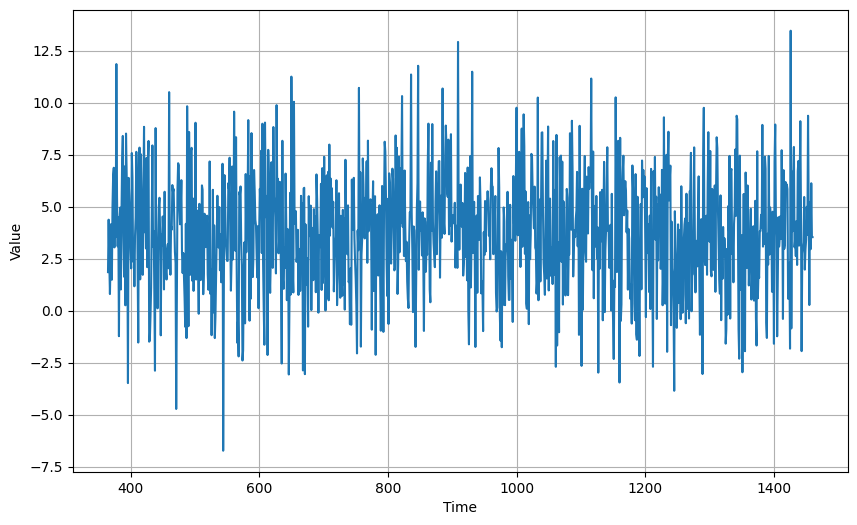

In [11]:
year=365
diff_series =  (series[year:] - series[:-year])
print("first vale:",diff_series,type(diff_series))
diff_time = time[year:]
print(f"Whole series has {len(series)} elements so the differencing should have {len(series)-year} elements.")
print(f"diff series has shape: {diff_series.shape} ")
print(f"x-coordinate of diff series has shape: {diff_time.shape}\n")

plt.figure(figsize=(10, 6))
F.plot_series(diff_time, diff_series)
plt.show()

moving average forecast with diff series has shape: (1046,)

moving average forecast with diff series after slicing has shape: (361,)

comparable with validation series: True


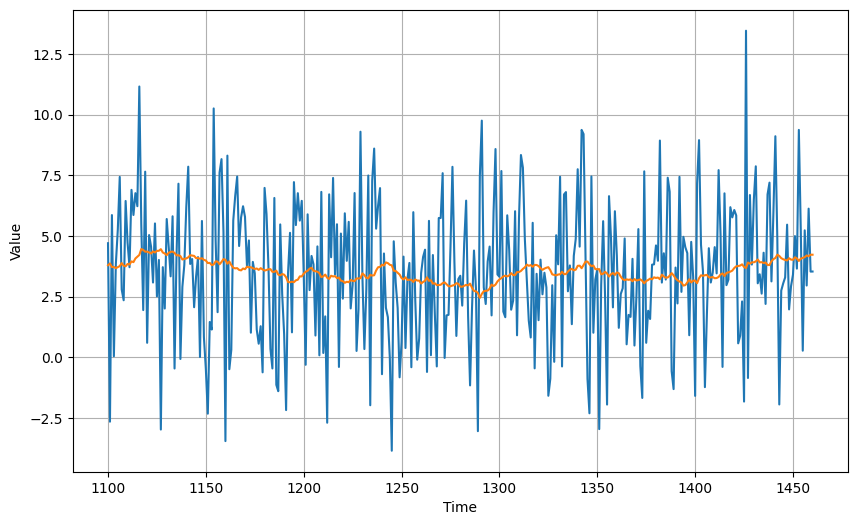

In [12]:
diff_moving_avg = F.moving_average_forecast(diff_series, 50)
print(f"moving average forecast with diff series has shape: {diff_moving_avg.shape}\n")
diff_moving_avg = diff_moving_avg[splitTime-year-50:]
print(f"moving average forecast with diff series after slicing has shape: {diff_moving_avg.shape}\n")
print(f"comparable with validation series: {series_valid.shape == diff_moving_avg.shape}")
plt.figure(figsize=(10, 6))
F.plot_series(time_valid, diff_series[splitTime - year:])
F.plot_series(time_valid, diff_moving_avg)
plt.show()

past series has shape: (361,)

moving average forecast with diff series plus past has shape: (361,)

comparable with validation series: True


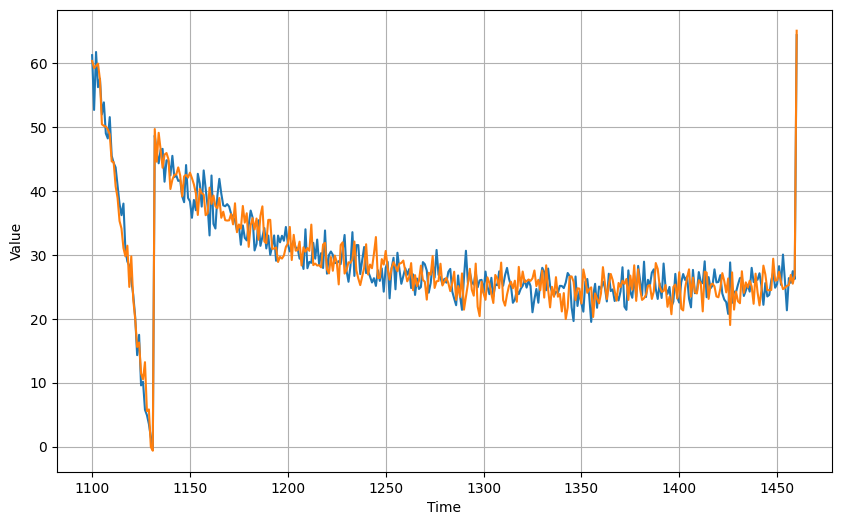

In [13]:
# Slice the whole SERIES to get the past values
past_series = series[splitTime-year:-year]
print(f"past series has shape: {past_series.shape}\n")
# Add the past to the moving average of diff series
diff_moving_avg_plus_past = past_series + diff_moving_avg
print(f"moving average forecast with diff series plus past has shape: {diff_moving_avg_plus_past.shape}\n")
print(f"comparable with validation series: {series_valid.shape == diff_moving_avg_plus_past.shape}")
plt.figure(figsize=(10, 6))
F.plot_series(time_valid, series_valid)
F.plot_series(time_valid, diff_moving_avg_plus_past)
plt.show()

In [14]:
# Compute evaluation metrics
mse, mae = F.compute_metrics(series_valid, diff_moving_avg_plus_past)
print(f"mse: {mse:.2f}, mae: {mae:.2f} for moving average plus past forecast")
# Expected Output: mse: 8.50, mae: 2.33 for moving average plus past forecast



mse: 8.50, mae: 2.33 for moving average plus past forecast


smooth past series has shape: (361,)

moving average forecast with diff series plus past has shape: (361,)

comparable with validation series: True


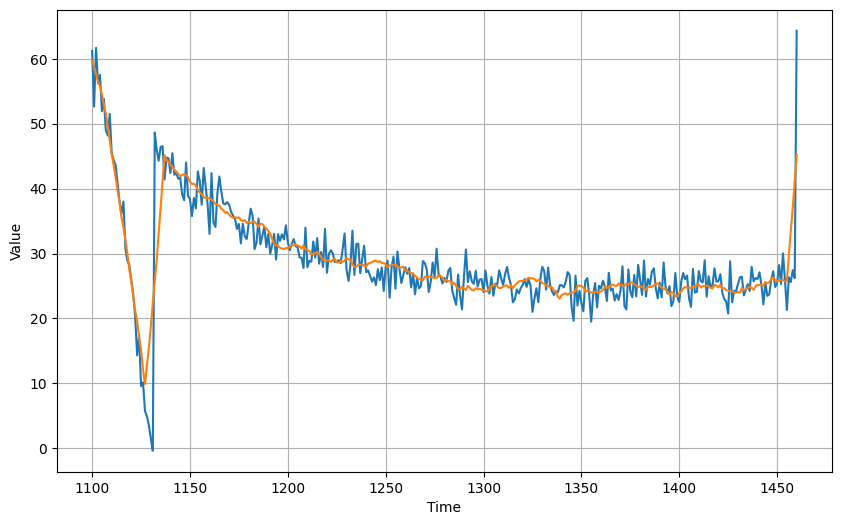

In [15]:
# Perform the correct split of SERIES
smooth_past_series = F.moving_average_forecast(series[splitTime - 370:-360], 10)
print(f"smooth past series has shape: {smooth_past_series.shape}\n")
diff_moving_avg_plus_smooth_past = smooth_past_series +  diff_moving_avg
print(f"moving average forecast with diff series plus past has shape: {diff_moving_avg_plus_smooth_past.shape}\n")
print(f"comparable with validation series: {series_valid.shape == diff_moving_avg_plus_smooth_past.shape}")
plt.figure(figsize=(10, 6))
F.plot_series(time_valid, series_valid)
F.plot_series(time_valid, diff_moving_avg_plus_smooth_past)
plt.show()

In [20]:
mse, mae = F.compute_metrics(series_valid, diff_moving_avg_plus_smooth_past)
print(f"mse: {mse:.2f}, mae: {mae:.2f} for moving average plus smooth past forecast")
# Expected Output: mse: 12.53, mae: 2.20 for moving average plus smooth past forecast



mse: 12.53, mae: 2.20 for moving average plus smooth past forecast
